In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
math_data = pd.read_csv("student-mat.csv")

In [2]:
#Dropping unwanted attributes
math_data.drop(['address', 'school', 'age', 'nursery', 'famsize', 'failures', 'Mjob', 'romantic', 'Fjob', 'reason', 'goout', 'guardian', 'famsup', 'Dalc', 'Walc', 'G2'], axis = 1, inplace=True)
#math_data.drop(['address', 'G2'], axis=1, inplace=True)

In [3]:
#Filling in categorical data with dummy variables
data_dum = pd.get_dummies(math_data)

In [4]:
#dropping some additional columns
data_dum.drop(['Pstatus_A', 'schoolsup_no', 'paid_no', 'activities_no', 'internet_no', 'higher_no'], axis=1, inplace=True)

In [5]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_dum, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  316 Test size:  79


In [6]:
#Defining the independent and dependent variables
X = data_dum.drop('G3', axis=1)
y = data_dum.G3.values
#Defining the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [7]:
ranfor = RandomForestRegressor()
ranfor.fit(X, y)


RandomForestRegressor()

Text(0.5, 1.0, 'Actual vs. Predicted on Data Set (Random Forest)')

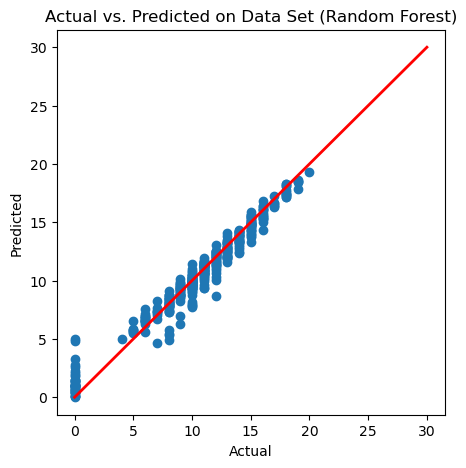

In [11]:
y_pred = ranfor.predict(X)
plt.figure(figsize=(5,5))
plt.scatter(y, y_pred)
plt.plot([0,30],[0,30],color='r', linestyle = '-', linewidth = 2)

plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual vs. Predicted on Data Set (Random Forest)')

Text(0.5, 1.0, 'Actual vs. Predicted on Training Set (Random Forest)')

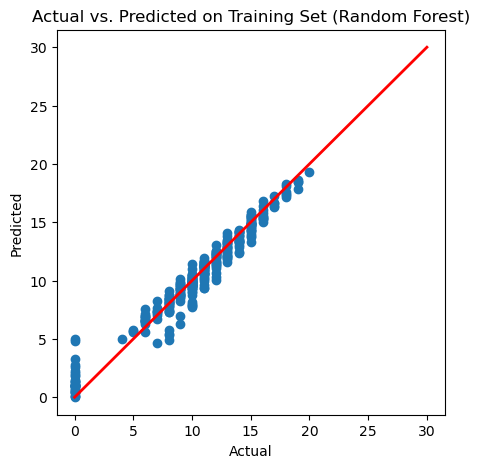

In [12]:
y_pred = ranfor.predict(X_train)
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred)
plt.plot([0,30],[0,30],color='r', linestyle = '-', linewidth = 2)

plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual vs. Predicted on Training Set (Random Forest)')

Text(0.5, 1.0, 'Actual vs. Predicted on Test Set (Random Forest)')

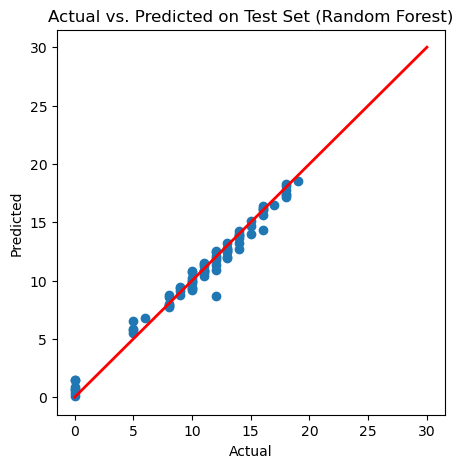

In [13]:
y_pred = ranfor.predict(X_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0,30],[0,30],color='r', linestyle = '-', linewidth = 2)

plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual vs. Predicted on Test Set (Random Forest)')

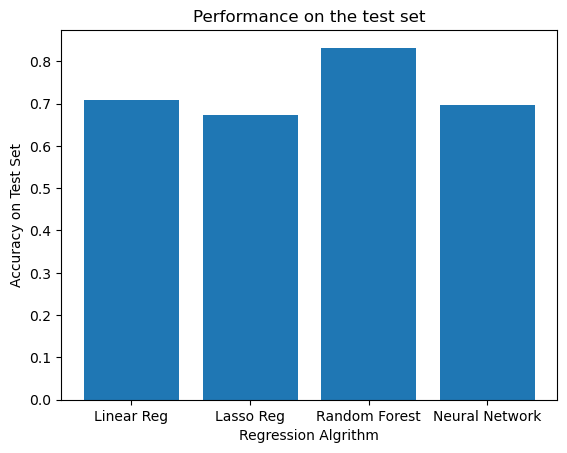

In [15]:
x = ['Linear Reg', 'Lasso Reg', 'Random Forest', 'Neural Network']
y = [.708, .674, .832, .697]
positions = range(len(x))

plt.bar(positions, y)
plt.xticks(positions, x)
plt.title('Performance on the test set')
plt.xlabel('Regression Algrithm')
plt.ylabel('Accuracy on Test Set')
plt.show()

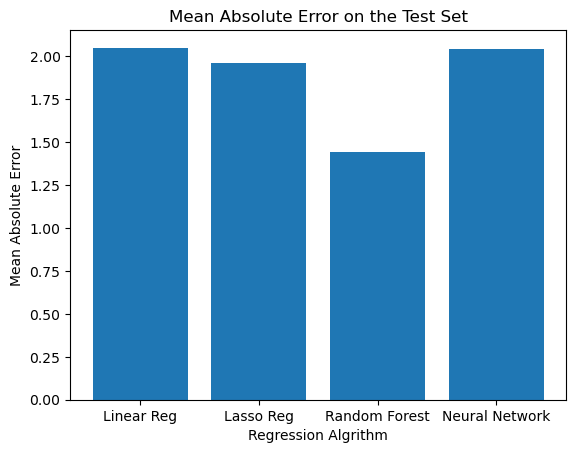

In [16]:
w = ['Linear Reg', 'Lasso Reg', 'Random Forest', 'Neural Network']
z = [2.05, 1.96, 1.44, 2.04]
positions = range(len(x))

plt.bar(positions, z)
plt.xticks(positions, w)
plt.title('Mean Absolute Error on the Test Set')
plt.xlabel('Regression Algrithm')
plt.ylabel('Mean Absolute Error')
plt.show()

In [20]:
import shap
shap.initjs()

In [32]:
explainer = shap.Explainer(ranfor)
shap_values =  explainer(X)

In [33]:
np.shape(shap_values.values)

(395, 17)

[0.02541055 0.01510353 0.02180635 0.01681449 0.01183996 0.01351199
 0.01946119 0.14763728 0.65820364 0.00280189 0.00285897 0.00456231
 0.02478861 0.00998551 0.01757891 0.00171525 0.00591958]


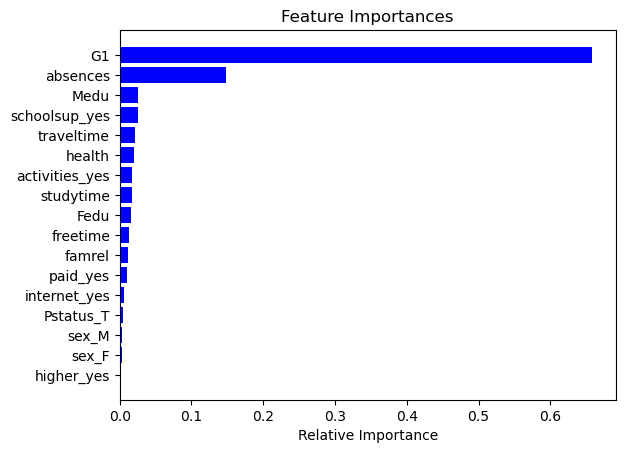

In [44]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
rf.fit(X_train, y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
